IMPORTING ESSENTIAL LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler

DATASET LOADING

In [2]:
df = pd.read_csv('/content/housing.csv')

BASIC INFO REGARDING DATASET

In [3]:
print("\nData Types:\n", df.dtypes)
print("Dataset Shape:", df.shape)
print("\nMissing Values:\n", df.isnull().sum())


Data Types:
 Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object
Dataset Shape: (21613, 22)

Missing Values:
 Unnamed: 0        0
id                0
date              0
price             0
bedrooms         13
bathrooms        10
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view              0
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
zipcode           0
lat              

IN ORDER TO HANDLE MISSING VALUES (use MEAN for NUMERIC values & MODE for CATEGORICAL values)

In [5]:

for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:
        df[col] = df[col].fillna(df[col].mean())
    elif df[col].dtype == 'object':
        df[col] = df[col].fillna(df[col].mode()[0])


ENCODING

In [6]:
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

NORMALIZING /STANDARDIZING

In [7]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

BOXPLOT

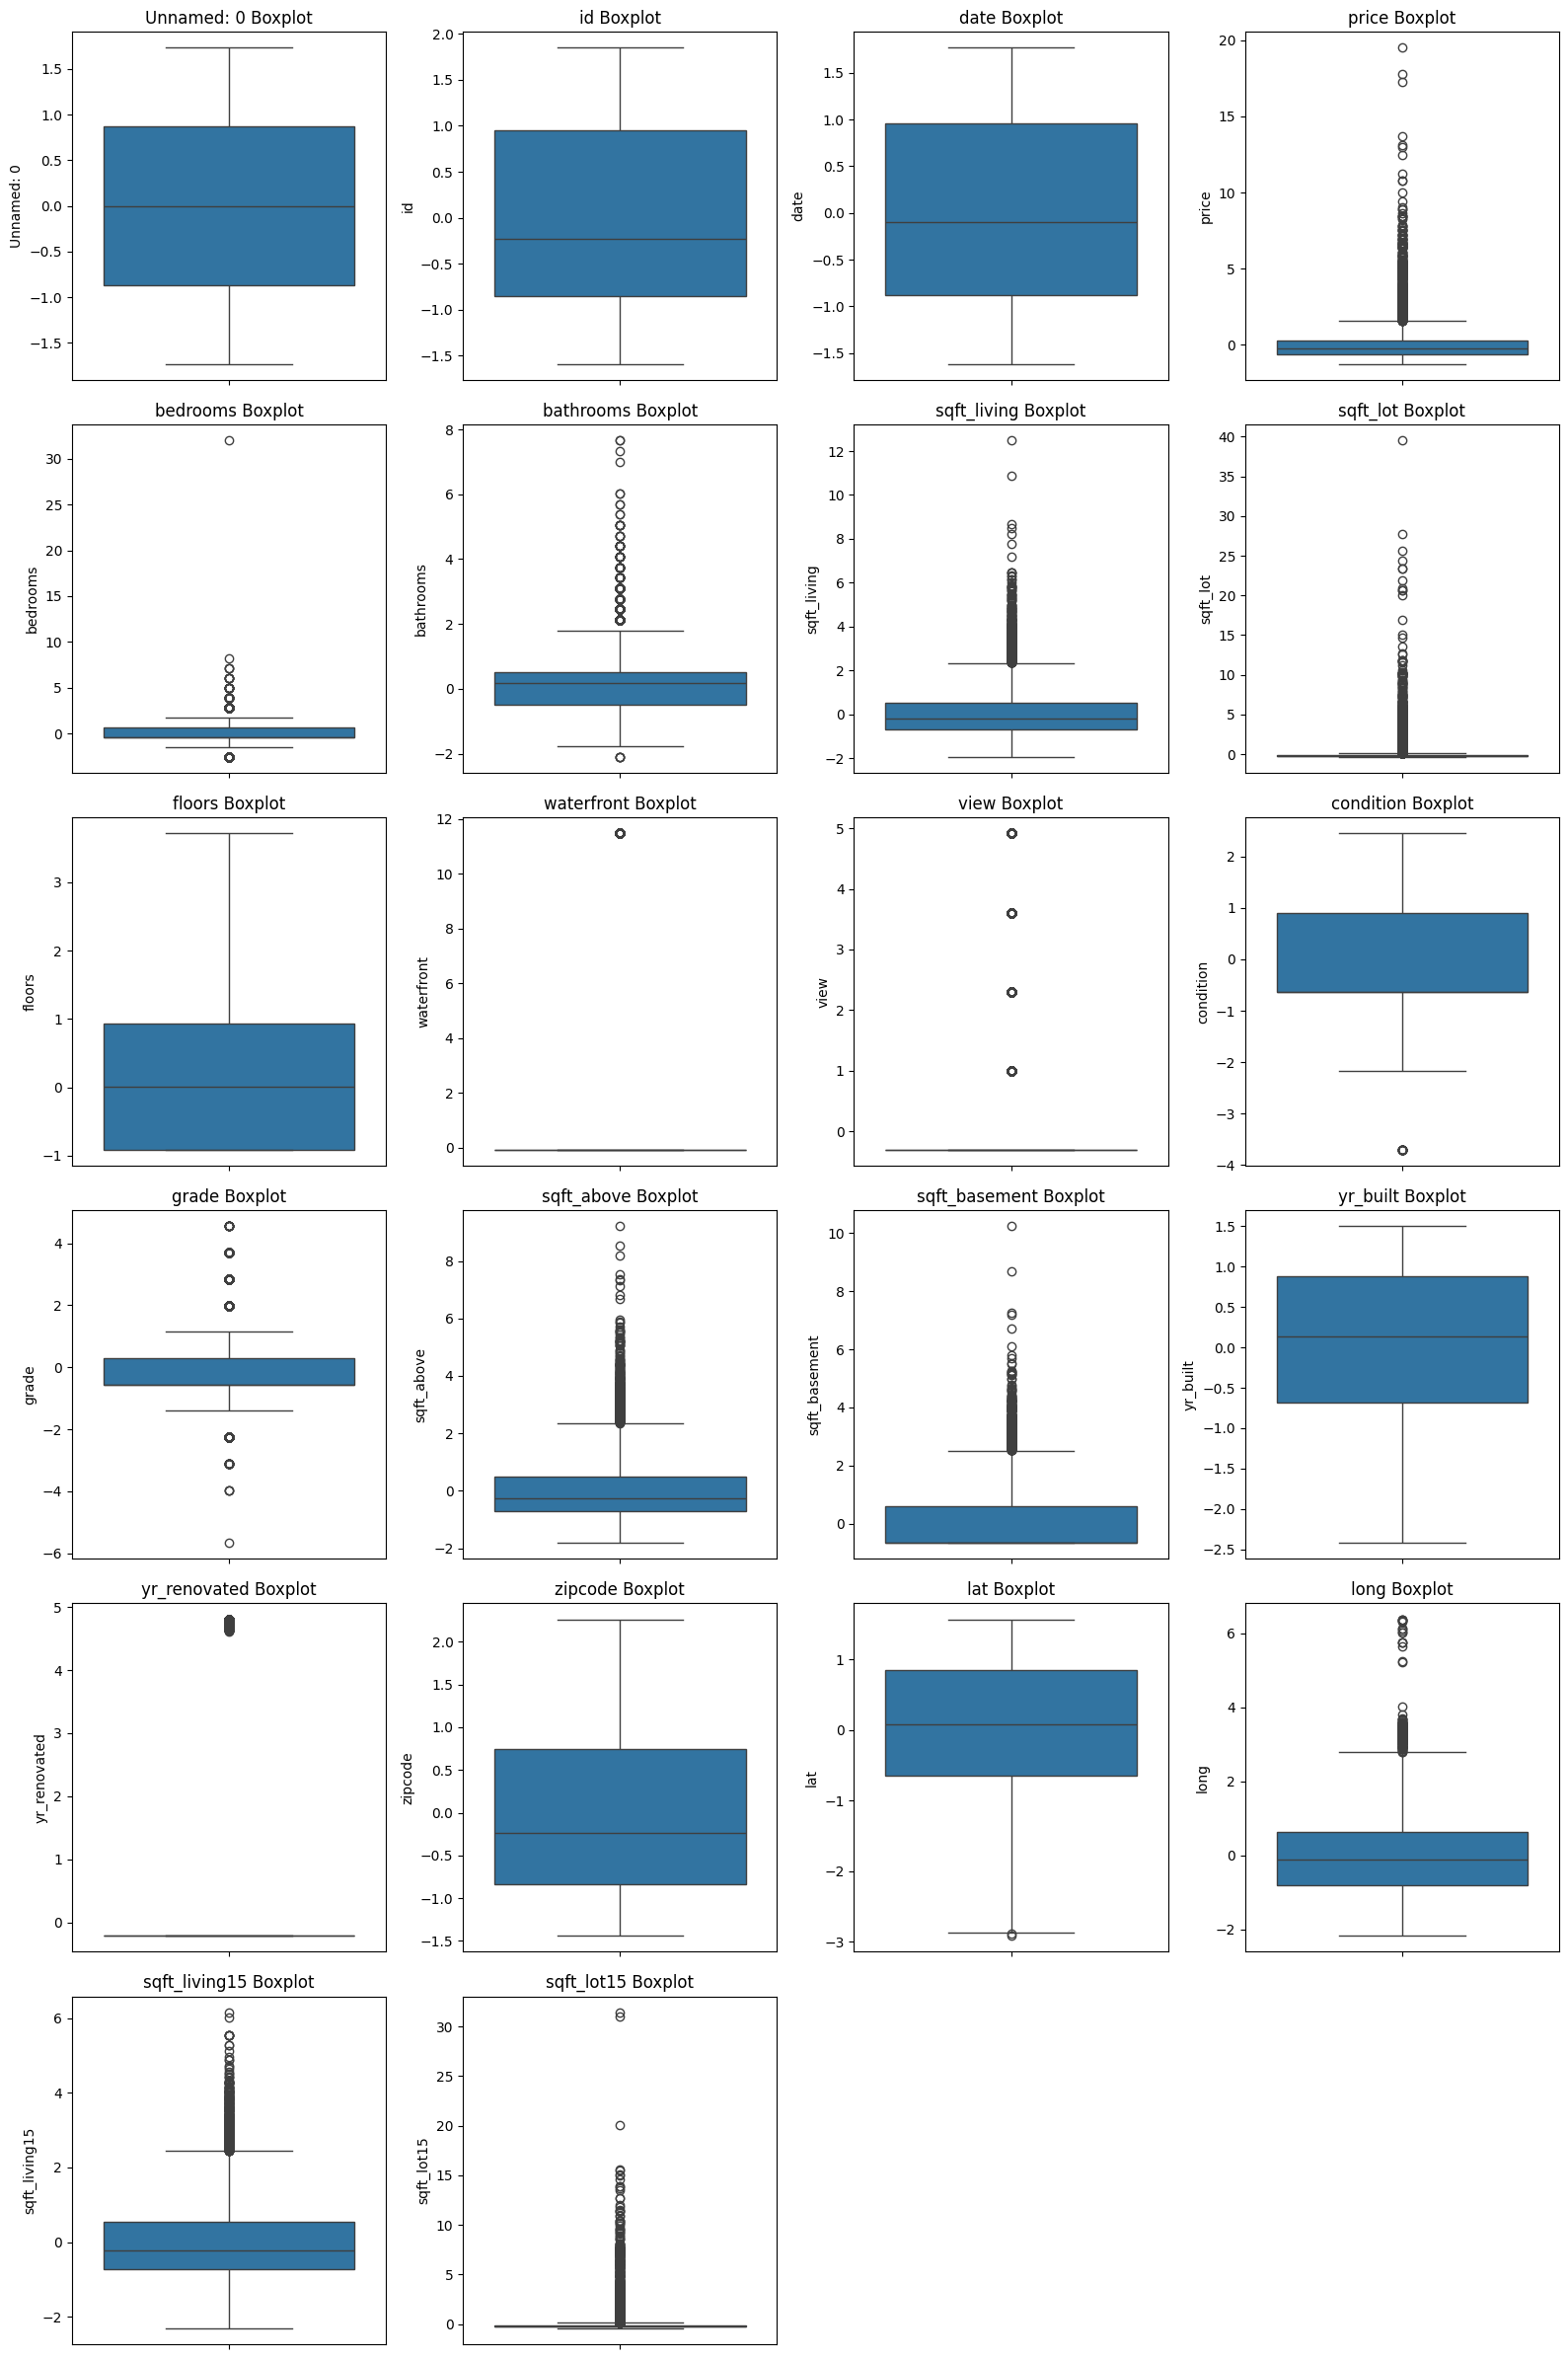

In [9]:
cols_per_row = 4
rows = int(np.ceil(len(numeric_cols) / cols_per_row))

plt.figure(figsize=(cols_per_row * 4, rows * 4))
for i, col in enumerate(numeric_cols):
    plt.subplot(rows, cols_per_row, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'{col} Boxplot')
plt.tight_layout()
plt.show()

INTERQUARTILE RANGE (IQR)

In [10]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [11]:
for col in numeric_cols:
    df = remove_outliers_iqr(df, col)

In [12]:
print("Cleaned Dataset Shape:", df.shape)
df.head()

Cleaned Dataset Shape: (13873, 22)


,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,-1.731971,0.886146,-0.121459,-0.866717,-0.402513,-1.451270,-0.979835,-0.228321,-0.915427,-0.087173,...,-0.558836,-0.734708,-0.658681,-0.544898,-0.210128,1.870152,-0.352572,-0.306079,-0.943355,-0.260715
2,-1.731650,0.365444,1.029214,-0.980849,-1.482011,-1.451270,-1.426254,-0.123298,-0.915427,-0.087173,...,-1.409587,-1.229834,-0.658681,-1.293892,-0.210128,-0.933388,1.283537,-0.135655,1.070140,-0.172375
3,-1.731490,-0.727656,0.389951,0.174090,0.676985,1.150187,-0.130550,-0.244014,-0.915427,-0.087173,...,-0.558836,-0.891699,1.397515,-0.204446,-0.210128,1.085160,-0.283288,-1.271816,-0.914174,-0.284522
4,-1.731330,-0.912881,0.965288,-0.081958,-0.402513,-0.150541,-0.435422,-0.169653,-0.915427,-0.087173,...,0.291916,-0.130895,-0.658681,0.544548,-0.210128,-0.073636,0.409550,1.199335,-0.272190,-0.192849
6,-1.731009,-1.132940,-1.107750,-0.769746,-0.402513,0.174641,-0.397313,-0.200098,0.936506,-0.087173,...,-0.558836,-0.088628,-0.658681,0.816910,-0.210128,-1.400645,-1.806810,-0.803149,0.366876,-0.217900
